In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
doc = open('doc.txt').readlines()

In [3]:
newdoc = []
for line in doc:
    if line[-1] == '\n':
        newdoc.append(line[:-1])

In [4]:
newdoc = newdoc[2]
col = newdoc.split(sep=',')

In [5]:
df = pd.read_table('./data.txt',sep=',',header=None)
df.columns = col
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,-1
1,5,4,4,5,7,10,3,2,1,-1
2,3,1,1,1,2,2,3,1,1,-1
3,6,8,8,1,3,4,3,7,1,-1
4,4,1,1,3,2,1,3,1,1,-1


In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              699 non-null    int64
 1   Uniformity of Cell Size      699 non-null    int64
 2   Uniformity of Cell Shape     699 non-null    int64
 3   Marginal Adhesion            699 non-null    int64
 4   Single Epithelial Cell Size  699 non-null    int64
 5   Bare Nuclei                  699 non-null    int64
 6   Bland Chromatin              699 non-null    int64
 7   Normal Nucleoli              699 non-null    int64
 8   Mitoses                      699 non-null    int64
 9   Class                        699 non-null    int64
dtypes: int64(10)
memory usage: 60.1 KB


In [8]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,-0.310443
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,-1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,-1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [9]:
df.apply(pd.value_counts)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,458.0
1,145.0,384.0,353.0,407.0,47.0,418.0,152.0,443.0,579.0,241.0
2,50.0,45.0,59.0,58.0,386.0,30.0,166.0,36.0,35.0,NaN
3,108.0,52.0,56.0,58.0,72.0,28.0,165.0,44.0,33.0,NaN
4,80.0,40.0,44.0,33.0,48.0,19.0,40.0,18.0,12.0,NaN
5,130.0,30.0,34.0,23.0,39.0,30.0,34.0,19.0,6.0,NaN
6,34.0,27.0,30.0,22.0,41.0,4.0,10.0,22.0,3.0,NaN
7,23.0,19.0,30.0,13.0,12.0,8.0,73.0,16.0,9.0,NaN
8,46.0,29.0,28.0,25.0,21.0,21.0,28.0,24.0,8.0,NaN
9,14.0,6.0,7.0,5.0,2.0,9.0,11.0,16.0,NaN,NaN


According to the description of data min, max and other features in the describe table, it seems that doesn't need normalization.

<AxesSubplot:>

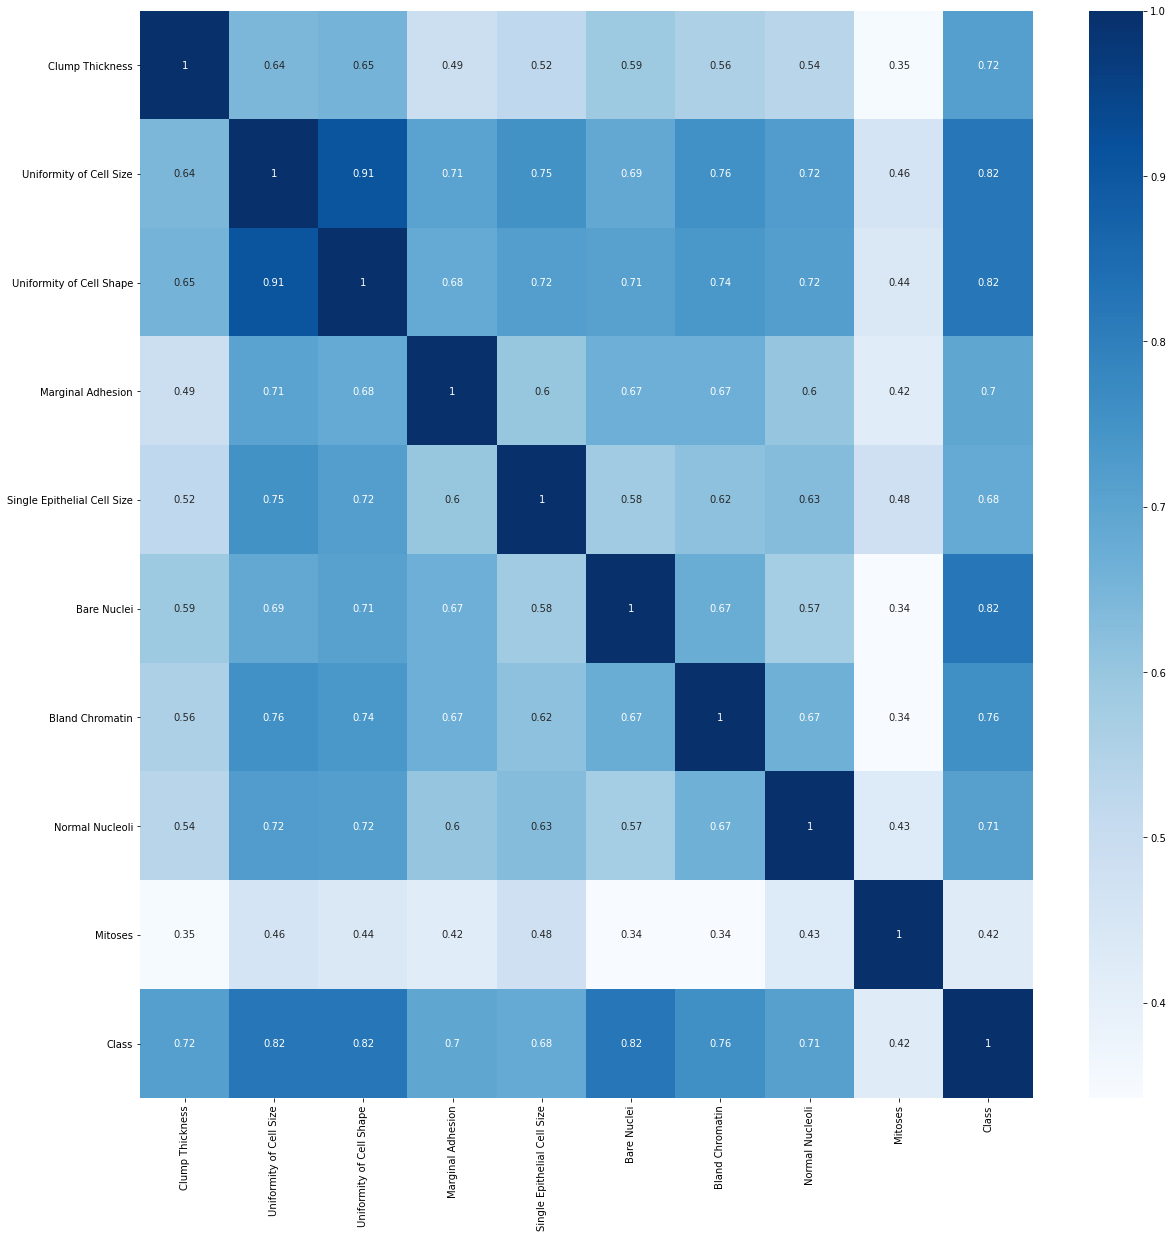

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

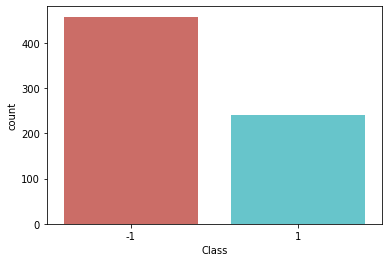

In [11]:
sns.countplot(x = 'Class',data=df,palette='hls')
plt.show()

<AxesSubplot:xlabel='Class', ylabel='count'>

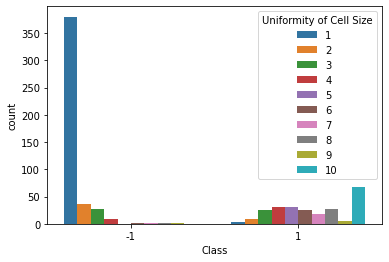

In [12]:
sns.countplot(x='Class',hue='Uniformity of Cell Size',data=df)

<AxesSubplot:xlabel='Class', ylabel='count'>

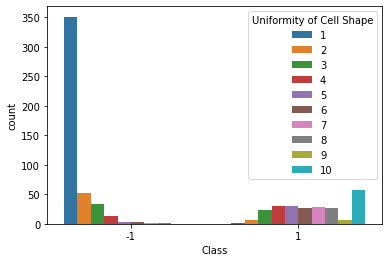

In [13]:
sns.countplot(x='Class',hue='Uniformity of Cell Shape',data=df)

<AxesSubplot:xlabel='Class', ylabel='count'>

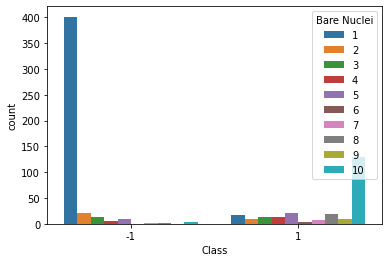

In [14]:
sns.countplot(x='Class',hue='Bare Nuclei',data=df)

<AxesSubplot:xlabel='Class', ylabel='count'>

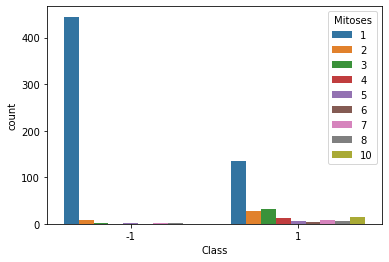

In [15]:
sns.countplot(x='Class',hue='Mitoses',data=df)

In [16]:
y = df['Class']
x = df.drop('Class', axis=1)

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [18]:
logmodel = LogisticRegression()

In [19]:
logmodel.fit(x_train, y_train)

LogisticRegression()

In [20]:
y_pred = logmodel.predict(x_test)

In [21]:
print('Accuracy',(logmodel.score(x_test,y_test)))

Accuracy 0.9785714285714285


In [22]:
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

array([[91,  1],
       [ 2, 46]], dtype=int64)